<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Cosmetics_ingr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np

In [108]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [106]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [464]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('COSING_Ingredients-Fragrance Inventory_v2 .csv')

In [333]:
df.head(10)

,COSING Ref No,INCI name,INN name,Ph. Eur. Name,CAS No,EC No,Chem/IUPAC Name / Description,Restriction,Function,Update Date
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,NaN,NaN,"2040469-40-5, 2422121-34-2",NaN,Disodium Tetramethylhexadecenylcysteine Formyl...,NaN,SKIN PROTECTING,16/06/2020
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,NaN,NaN,NaN,NaN,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,NaN,SKIN CONDITIONING - EMOLLIENT,19/03/2021
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,NaN,NaN,NaN,NaN,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,NaN,SKIN CONDITIONING - EMOLLIENT,19/03/2021
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,NaN,NaN,NaN,NaN,(Liquidambar Styraciflua/Tribulus Terrestris)...,NaN,SKIN CONDITIONING,01/12/2017
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,NaN,NaN,99728-55-9,NaN,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,NaN,PLASTICISER,14/02/2018
5,96229,ASTROCARYUM VULGARE SEED BUTTER,NaN,NaN,2187449-53-0,NaN,Astrocaryum Vulgare Seed Butter is the fat obt...,NaN,"SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT",06/04/2018
6,89177,BARLEY SH-POLYPEPTIDE-17,NaN,NaN,NaN,NaN,Barley sh-Polypeptide-17 is a single chain rec...,NaN,"HAIR CONDITIONING, SKIN CONDITIONING",09/03/2018
7,100088,CITRULLUS LANATUS SEED POWDER,NaN,NaN,90244-99-8,290-802-9,Citrullus Lanatus Seed Powder is the powder ob...,NaN,"ABRASIVE, EXFOLIATING",23/09/2021
8,98580,DAUCUS CAROTA SATIVA LEAF EXTRACT,NaN,NaN,NaN,NaN,Daucus Carota Sativa (Carrot) Leaf Extract is ...,NaN,SKIN CONDITIONING - MISCELLANEOUS,18/09/2020
9,89078,GOSSYPIUM HIRSUTUM SEED EXTRACT,NaN,NaN,8001-29-4,232-280-7,Gossypium Hirsutum Seed Extract is the extrac...,NaN,SKIN CONDITIONING,04/07/2012


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30070 entries, 0 to 30069
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  30070 non-null  int64 
 1   INCI name                      30070 non-null  object
 2   INN name                       519 non-null    object
 3   Ph. Eur. Name                  183 non-null    object
 4   CAS No                         18473 non-null  object
 5   EC No                          15127 non-null  object
 6   Chem/IUPAC Name / Description  29593 non-null  object
 7   Restriction                    1948 non-null   object
 8   Function                       29853 non-null  object
 9   Update Date                    30070 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


**Column Details:**

**COSING Ref No**: Unique reference number for each ingredient.

**INCI name**: International Nomenclature of Cosmetic Ingredients name.

**INN name**: International Nonproprietary Name.

**Ph. Eur. Name**: European Pharmacopoeia name.

**CAS No**: Chemical Abstracts Service number, a unique identifier for chemical substances.

**EC No**: European Community number, another identifier for chemical substances.

**Chem/IUPAC Name / Description**: Chemical or IUPAC name, along with a description of the ingredient.

**Restriction**: Regulatory restrictions or limitations on ingredient use.

**Function**: Functional classification(s) describing the purpose of the ingredient in cosmetic formulations.

**Update Date**: Date when the information was last updated.

In [7]:
# Check for duplicates in the 'INCI name' column
duplicate_inci_names = df[df.duplicated(subset=['INCI name'], keep=False)]

# Print the count of duplicates
print(f"Number of duplicate entries based on INCI name: {len(duplicate_inci_names)}")

Number of duplicate entries based on INCI name: 16


In [8]:
# Drop duplicates based on 'INCI name' column
df.drop_duplicates(subset=['INCI name'], keep='first', inplace=True)

In [335]:
# Convert columns to boolean indicating presence of Ph. Eur. Name and Restrictions
df['Has_Ph_Eur_Name'] = df['Ph. Eur. Name'].notna()
df['Has_Restrictions'] = df['Restriction'].notna()

# Create a cross-tabulation
cross_tab = pd.crosstab(df['Has_Ph_Eur_Name'], df['Has_Restrictions'])

# Print or display the cross-tabulation
print(cross_tab)

# Calculate proportions
total_with_Ph_Eur_Name = cross_tab.loc[True].sum()  # Total ingredients with Ph. Eur. Name
total_with_Restrictions = cross_tab[True].sum()  # Total ingredients with Restrictions
total_with_Ph_Eur_Name_and_Restrictions = cross_tab.loc[True, True]  # Ingredients with both

# Proportion of Ingredients with Restrictions among those with Ph. Eur. Name
proportion_with_Restrictions_with_Ph_Eur_Name = total_with_Ph_Eur_Name_and_Restrictions / total_with_Ph_Eur_Name

# Proportion of Ingredients without Ph. Eur. Name but with Restrictions
proportion_without_Ph_Eur_Name_with_Restrictions = (total_with_Restrictions - total_with_Ph_Eur_Name_and_Restrictions) / (len(df) - total_with_Ph_Eur_Name)
# Calculate the total number of ingredients with Restrictions
total_with_Restrictions = df['Has_Restrictions'].sum()

# Calculate the proportion of ingredients with Restrictions among all ingredients
proportion_with_Restrictions_all = total_with_Restrictions / len(df)

# Create a subset of ingredients that have a Ph. Eur. Name
ph_eur_name_subset = df[df['Has_Ph_Eur_Name']]

# Count ingredients with and without Restrictions in the subset
total_with_Ph_Eur_Name = len(ph_eur_name_subset)
total_with_Restrictions = ph_eur_name_subset['Has_Restrictions'].sum()

# Calculate the proportion of ingredients without Restrictions among those with Ph. Eur. Name
proportion_without_Restrictions_with_Ph_Eur_Name = (total_with_Ph_Eur_Name - total_with_Restrictions) / total_with_Ph_Eur_Name

# Display the result
print(f"Proportion of Ingredients without Restrictions among those with Ph. Eur. Name: {proportion_without_Restrictions_with_Ph_Eur_Name:.2%}")

# Display results
print(f"Proportion of Ingredients with Restrictions among those with Ph. Eur. Name: {proportion_with_Restrictions_with_Ph_Eur_Name:.2%}")

# Display the result
print(f"Proportion of Ingredients with Restrictions among all ingredients: {proportion_with_Restrictions_all:.2%}")

Has_Restrictions  False  True 
Has_Ph_Eur_Name               
False             27991   1896
True                131     52
Proportion of Ingredients without Restrictions among those with Ph. Eur. Name: 71.58%
Proportion of Ingredients with Restrictions among those with Ph. Eur. Name: 28.42%
Proportion of Ingredients with Restrictions among all ingredients: 6.48%


As we can see there is a slight correlation between whether an ingredient has a pharmacological number and whether it has restrictions (the difference between "Proportion of Ingredients with Restrictions among those with Ph. Eur. Name: 28.42%" and
"Proportion of Ingredients with Restrictions among all ingredients: 6.48%" is more than 4 times). Most likely some of the ingredients belong not only to the cosmetics industry, but also to the pharmaceutical industry, which implies different standards and more restrictions

In [336]:
# Drop the columns because they have too many empty cells
df.drop(columns=['INN name', 'Ph. Eur. Name', 'Has_Restrictions', 'Has_Ph_Eur_Name'], inplace=True)

In [337]:
# Drop the columns that I do not plan to work with in the initial analysis
df.drop(columns=['CAS No', 'EC No'], inplace=True)

In [338]:
# Convert 'Update Date' column to datetime type
df['Update Date'] = pd.to_datetime(df['Update Date'], format='%d/%m/%Y')

In [339]:
# Check for duplicates
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [340]:
# Unique functions and their counts
print("\nUnique Functions and their Counts:")
df['Function'].value_counts()


Unique Functions and their Counts:


Function
SKIN CONDITIONING                                                             6527
PERFUMING                                                                     2142
SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT                               919
SURFACTANT - CLEANSING, SURFACTANT - EMULSIFYING                               810
ANTIOXIDANT                                                                    627
                                                                              ... 
ANTIMICROBIAL, ANTIOXIDANT, SKIN CONDITIONING - HUMECTANT, SKIN PROTECTING       1
CHELATING, PERFUMING                                                             1
ANTISTATIC, HAIR CONDITIONING, HAIR FIXING, VISCOSITY CONTROLLING                1
ANTI-SEBORRHEIC, ANTIOXIDANT, SKIN CONDITIONING, SKIN PROTECTING                 1
ANTI-SEBORRHEIC, ANTI-SEBUM, ANTIMICROBIAL                                       1
Name: count, Length: 2504, dtype: int64

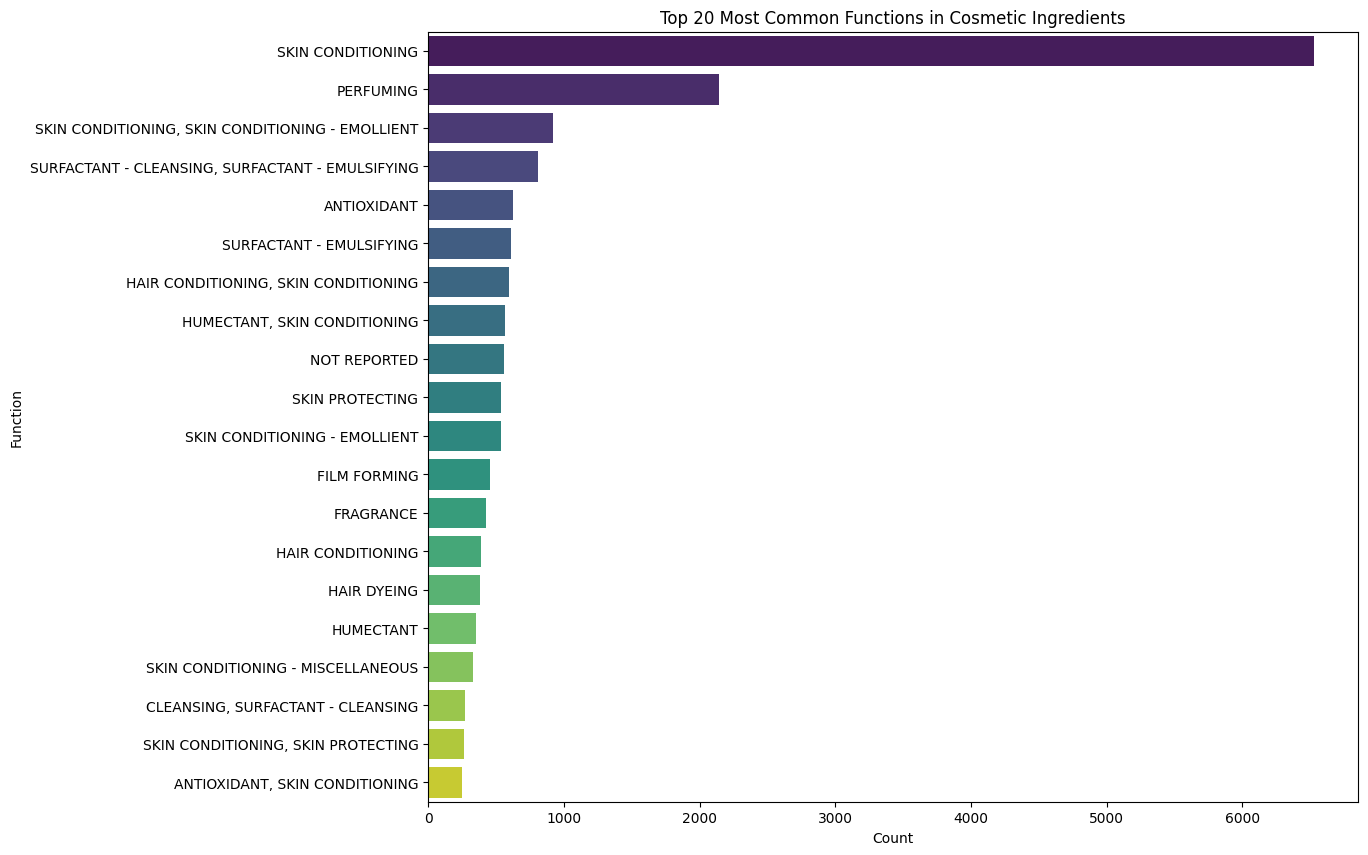

In [341]:
# Count the unique functions
function_counts = df['Function'].value_counts()

# Plot the top 20 most common functions
plt.figure(figsize=(12, 10))
sns.barplot(y=function_counts.head(20).index, x=function_counts.head(20).values, hue=function_counts.head(20).index, dodge=False, palette="viridis", legend=False)
plt.title('Top 20 Most Common Functions in Cosmetic Ingredients')
plt.xlabel('Count')
plt.ylabel('Function')
plt.show()

In [342]:
# Replace 'NOT REPORTED' with NaN in 'Function' column
df['Function'].replace('NOT REPORTED', pd.NA, inplace=True)

# Drop rows with NaN values in 'Function' column
df.dropna(subset=['Function'], inplace=True)

In [343]:
# Creating the 'Multifunctionality' column, that will show whether the ingredient has one function or several functions
df['Multifunctionality'] = df['Function'].apply(lambda x: True if ',' in x else False)

In [344]:
# Function to clean function value, because 'NOT REPORTED' also appears in ingredients where other functions are specified
def clean_functions(functions_str):
    functions_list = [func.strip() for func in functions_str.split(',') if func.strip() != 'NOT REPORTED']
    return ', '.join(functions_list)

# Apply the cleaning function to 'Function' column
df['Function'] = df['Function'].apply(clean_functions)

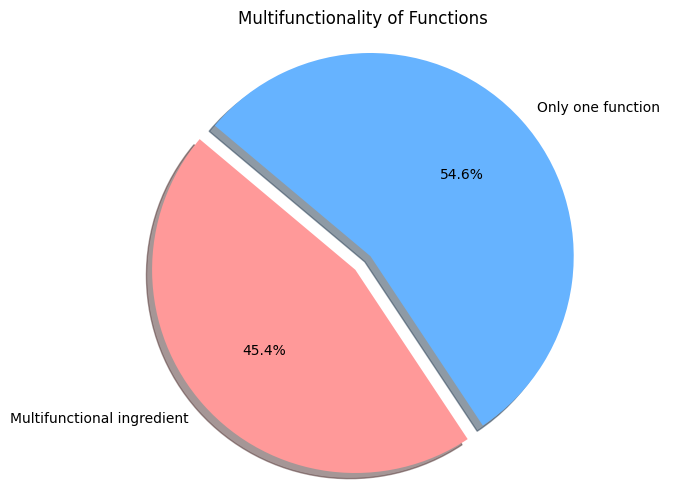

In [345]:
# Count True and False values
count_true = df['Multifunctionality'].sum()
count_false = len(df) - count_true

# Plotting
labels = ['Multifunctional ingredient', 'Only one function']
sizes = [count_true, count_false]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Multifunctionality of Functions')
plt.axis('equal')
plt.show()

Although the fact that ingredients with a single function are slightly more numerous than multifunctional ingredients, this is not really true, as a single function may in fact turn out to be multifunctional, e.g. "antioxidants" not only protect the skin, but also the cosmetic product itself, etc.

In [346]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 29297 entries, 0 to 30069
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COSING Ref No                  29297 non-null  int64         
 1   INCI name                      29297 non-null  object        
 2   Chem/IUPAC Name / Description  28839 non-null  object        
 3   Restriction                    1878 non-null   object        
 4   Function                       29297 non-null  object        
 5   Update Date                    29297 non-null  datetime64[ns]
 6   Multifunctionality             29297 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ MB


,COSING Ref No,INCI name,Chem/IUPAC Name / Description,Restriction,Function,Update Date,Multifunctionality
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,Disodium Tetramethylhexadecenylcysteine Formyl...,NaN,SKIN PROTECTING,2020-06-16,False
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,(Liquidambar Styraciflua/Tribulus Terrestris)...,NaN,SKIN CONDITIONING,2017-12-01,False
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,NaN,PLASTICISER,2018-02-14,False
5,96229,ASTROCARYUM VULGARE SEED BUTTER,Astrocaryum Vulgare Seed Butter is the fat obt...,NaN,"SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT",2018-04-06,True
6,89177,BARLEY SH-POLYPEPTIDE-17,Barley sh-Polypeptide-17 is a single chain rec...,NaN,"HAIR CONDITIONING, SKIN CONDITIONING",2018-03-09,True
7,100088,CITRULLUS LANATUS SEED POWDER,Citrullus Lanatus Seed Powder is the powder ob...,NaN,"ABRASIVE, EXFOLIATING",2021-09-23,True
8,98580,DAUCUS CAROTA SATIVA LEAF EXTRACT,Daucus Carota Sativa (Carrot) Leaf Extract is ...,NaN,SKIN CONDITIONING - MISCELLANEOUS,2020-09-18,False
9,89078,GOSSYPIUM HIRSUTUM SEED EXTRACT,Gossypium Hirsutum Seed Extract is the extrac...,NaN,SKIN CONDITIONING,2012-07-04,False


In [347]:
# Сount unique functions
def count_unique_functions(functions_str):
    # Split by comma and strip whitespace, filter out empty strings
    functions_list = [func.strip() for func in functions_str.split(',') if func.strip()]
    return Counter(functions_list)

# Apply the function to 'Function' column and sum up counts
function_counts = Counter()
for functions_str in df['Function']:
    function_counts += count_unique_functions(functions_str)

# Convert Counter to DataFrame for better display
function_counts_df = pd.DataFrame(list(function_counts.items()), columns=['Function', 'Count'])

# Sort the DataFrame by 'Function' column alphabetically
function_counts_df = function_counts_df.sort_values(by='Function')

# Display all unique functions and their counts, sorted alphabetically
print("Unique Functions and their Counts (Sorted Alphabetically):")
for index, row in function_counts_df.iterrows():
    print(f"{row['Function']}: {row['Count']}")

Unique Functions and their Counts (Sorted Alphabetically):
ABRASIVE: 364
ABSORBENT: 170
ADHESIVE: 5
ANTI-SEBORRHEIC: 114
ANTI-SEBUM: 270
ANTICAKING: 134
ANTICORROSIVE: 27
ANTIFOAMING: 50
ANTIMICROBIAL: 951
ANTIOXIDANT: 2558
ANTIPERSPIRANT: 38
ANTIPLAQUE: 90
ANTISTATIC: 1071
ASTRINGENT: 541
BINDING: 532
BLEACHING: 290
BUFFERING: 215
BULKING: 196
CHELATING: 181
CLEANSING: 1381
COLORANT: 264
DENATURANT: 41
DEODORANT: 202
DEPILATORY: 44
DETANGLING: 6
DISPERSING NON-SURFACTANT: 15
EMULSION STABILISING: 616
EPILATING: 1
EXFOLIATING: 84
EYELASH CONDITIONING: 6
FILM FORMING: 1227
FLAVOURING: 169
FOAMING: 205
FRAGRANCE: 1404
GEL FORMING: 24
HAIR CONDITIONING: 3328
HAIR DYEING: 434
HAIR FIXING: 230
HAIR WAVING OR STRAIGHTENING: 83
HUMECTANT: 2090
KERATOLYTIC: 20
LIGHT STABILIZER: 159
LYTIC: 1
MOISTURISING: 75
NAIL CONDITIONING: 189
NAIL SCULPTING: 8
OPACIFYING: 216
ORAL CARE: 213
OXIDISING: 36
PEARLESCENT: 2
PERFUMING: 2711
PLASTICISER: 172
PRESERVATIVE: 209
PROPELLANT: 20
REDUCING: 72
REFATTING

There are 3 types of skin conditioning:
1) emollient
2) humectant
3) occlusive

They differ in composition and principle of action, although they are aimed at moisturising the skin. Since no specific type is indicated for the largest group, it is possible to combine these subgroups into a single one.

**CONDITIONING AGENTS**:

1) SKIN CONDITIONING: Improves texture and feel of the skin.

  2) SKIN CONDITIONING - EMOLLIENT: Softens and soothes the skin.

  3) SKIN CONDITIONING - HUMECTANT: Retains moisture in the skin.

  4) SKIN CONDITIONING - OCCLUSIVE: Forms a barrier to prevent moisture loss.

5) HAIR CONDITIONING: Improves manageability and appearance of hair.

6) NAIL CONDITIONING: Strengthens and improves appearance of nails.

7) EYELASH CONDITIONING: Nourishes and strengthens eyelashes.

8) MOISTURIZING: Hydrates and retains moisture in the skin, hair, or nails.

9) SMOOTHING: Provides a smooth texture to skin or hair.

10) SOOTHING: Calms irritation or inflammation in skin.

11) DETANGLING: Facilitates combing and reduces hair tangling.

12) REFATTING: Adds lipids to skin or hair to restore lipid barrier.

13) REFRESHING: Provides a refreshing sensation to skin or hair.


**SURFACTANTS** (This is not a complete list):

14) FOAMING:

15) SURFACTANT - CLEANSING: Cleansing agent that removes dirt and oils.

16) SURFACTANT - DISPERSING: Promotes dispersion of substances in formulations.

17) SURFACTANT - EMULSIFYING: Stabilizes emulsions by enabling the mixing of oil and water.

18) SURFACTANT - FOAM BOOSTING: Increases foam volume in products.

19) SURFACTANT - HYDROTROPE: Enhances solubility of ingredients.

20) SURFACTANT - SOLUBILIZING: Increases solubility of substances in formulations.

21) CLEANSING AGENT (but it could be a solvent)


Classification is rather problematic because in the vast majority of cases the ingredient is multi-functional and corresponds to several classifiers at once. Standardisation of functions is needed. I'll come back to this question next.

In [348]:
# Count occurrences of each unique function
function_counts = df['Function'].str.split(', ').explode().str.strip().value_counts()

# Sort by counts for better visualization
function_counts = function_counts.sort_values(ascending=False)

# Extract unique functions after splitting by comma and stripping whitespace
unique_functions = df['Function'].str.split(', ').explode().str.strip().unique()

# Count the number of unique functions
num_unique_functions = len(unique_functions)

# Print the number of unique functions
print(f"Number of Unique Functions: {num_unique_functions}")

Number of Unique Functions: 80


So we have 80 unique functions for almost 30,000 ingredients, which is not bad. However, this list obviously has some weaknesses (I already mentioned conditioning), many terms are not clear, for example CLEANSING or MOISTURISING (for skin, for hair? or?)

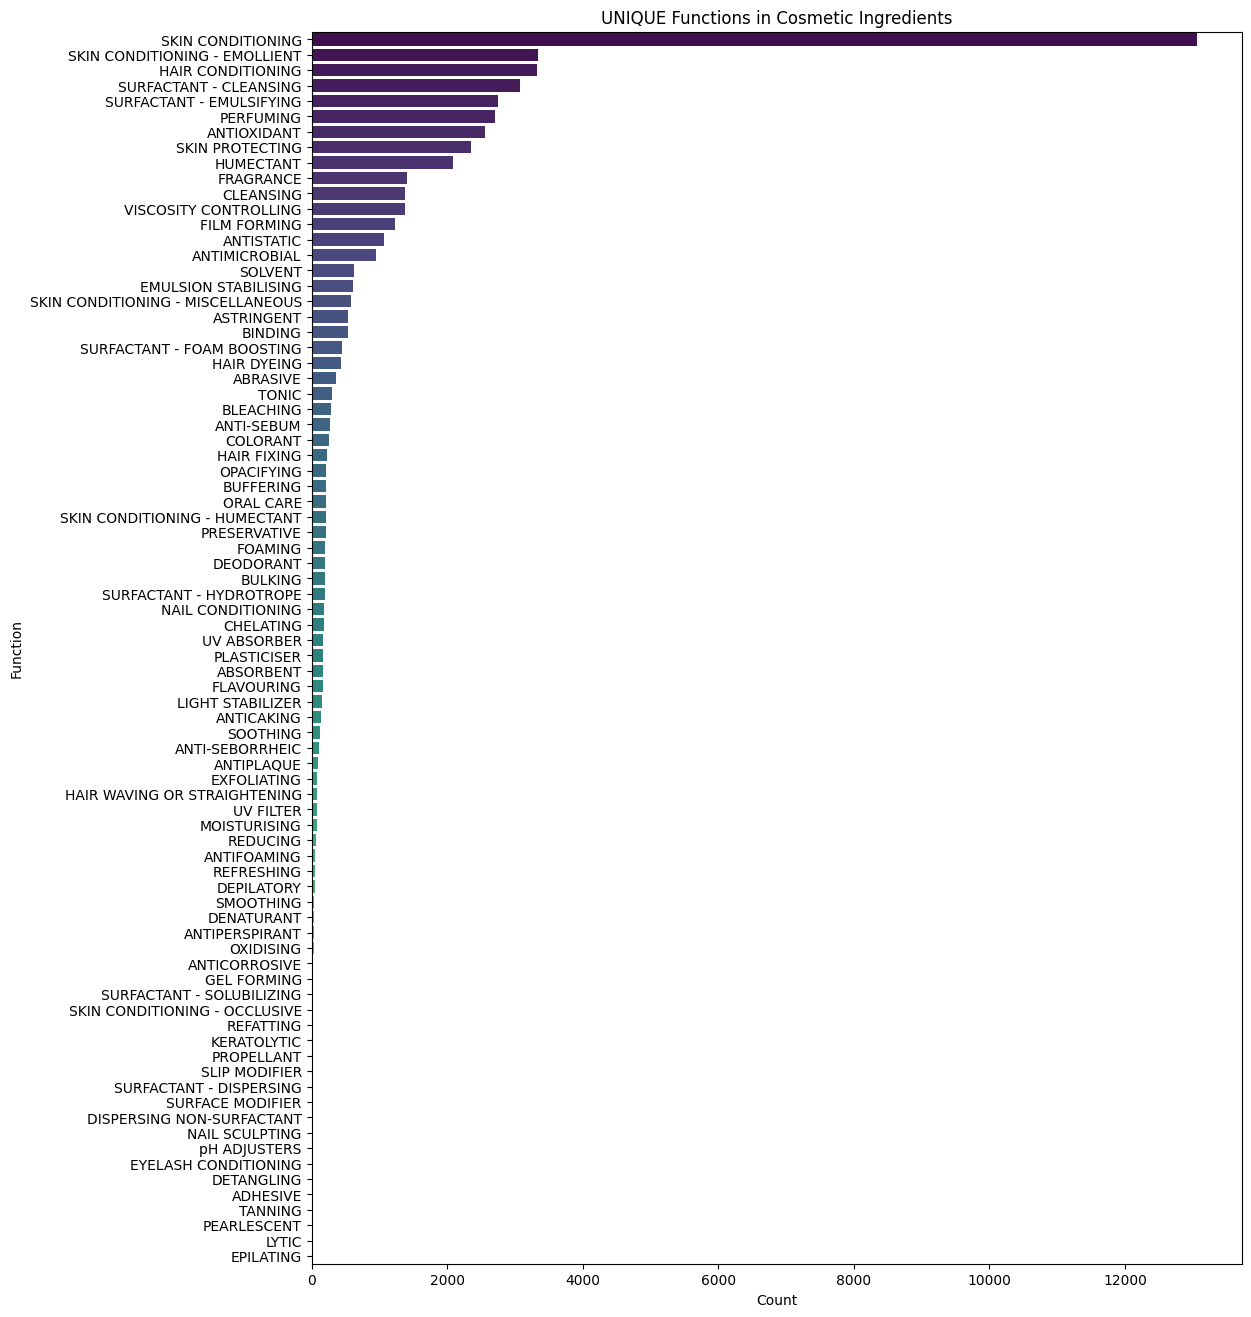

In [349]:
# Plot the functions
plt.figure(figsize=(12, 16))
sns.barplot(y=function_counts.index, x=function_counts.values, hue=function_counts.index, dodge=False, palette="viridis", legend=False)
plt.title('UNIQUE Functions in Cosmetic Ingredients')
plt.xlabel('Count')
plt.ylabel('Function')
plt.show()

The classification from https://cosmileeurope.eu/inci/ as a basis.

1) **Basic Ingredients**:

Emulsifying agents: EMULSION STABILISING, SURFACTANT - EMULSIFYING

Film-forming agents: FILM FORMING

Gel-forming agents: GEL FORMING

Oil components:

Soap basis: CLEANSING, SURFACTANT - CLEANSING

Solvents: SOLVENT

Surfactants: SURFACTANT - CLEANSING, SURFACTANT - DISPERSING, SURFACTANT - EMULSIFYING, SURFACTANT - FOAM BOOSTING, SURFACTANT - HYDROTROPE, SURFACTANT - SOLUBILIZING, FOAMING

Thickening agents / consistency regulators: BULKING, THICKENING AGENT, VISCOSITY CONTROLLING

Waxes:

2) **Excipients**:

Alkalising agents / Acids / Neutralising agents: BUFFERING, pH ADJUSTERS

Antioxidants: ANTIOXIDANT

Binders: BINDING

Denaturing agents: DENATURANT

Dyes / Pigments: COLORANT

Humectants: HUMECTANT

Opacifiers / Pearlescent substances: OPACIFYING, PEARLESCENT

Oxidants: OXIDISING

Plasticisers: PLASTICISER

Preservatives: PRESERVATIVE, ANTIMICROBIAL

Propellants for sprays: PROPELLANT

Reducing agents: REDUCING

Resins: ADHESIVE

Stabilisers: CHELATING, LIGHT STABILIZER

3) **Flavours and Fragrances**:

Essential oils: FRAGRANCE

Flavours: FLAVOURING

Perfume / Fragrances: PERFUMING, FRAGRANCE, DEODORANT

4) **Ingredients for Haircare**:

Anti-dandruff ingredients: ANTI-SEBORRHEIC, ANTI-SEBUM

Hair bleaching agent / Bleaching enhancer: BLEACHING

Hair dyes: HAIR DYEING

Hair setting polymers: HAIR FIXING

Haircare substances / Conditioning agents: HAIR CONDITIONING, DETANGLING

5) **Ingredients for Oral Care**:

Abrasives / Abrasive agents / Polishing agents: ABRASIVE

Antibacterial ingredients: ANTIMICROBIAL, ANTIPLAQUE

Bleaching agents for teeth: BLEACHING

Cooling agents: REFRESHING

Ingredients against sensitive teeth: ANTICORROSIVE

Ingredients for dental care / caries prevention: ORAL CARE

6) **Ingredients for Skincare**:

Abrasives / Abrasive agents / Polishing agents: ABRASIVE

Antibacterial ingredients: ANTIMICROBIAL

Antioxidants: ANTIOXIDANT

Antiperspirant ingredients / Astringents: ANTIPERSPIRANT, ASTRINGENT

Cooling agents: REFRESHING

Deodorising ingredients: DEODORANT

Hydroxyacids / Hydroxycarbonic acids: KERATOLYTIC

Ingredients for chemical hair removal / depilation: DEPILATORY, EPILATING

Ingredients for skincare: SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT, SKIN CONDITIONING - HUMECTANT, SKIN CONDITIONING - MISCELLANEOUS, SKIN CONDITIONING - OCCLUSIVE, SOOTHING, SMOOTHING, MOISTURISING, REFATTING

Moisturisers: MOISTURISING

Refattening substances: REFATTING

Self-tanning ingredients: TANNING

Skin-bleaching ingredients: BLEACHING

Sunscreens / UV filters: UV ABSORBER, UV FILTER, SKIN PROTECTING

In [350]:
# Define the dictionary with categories and corresponding functions
categories = {
    'Basic Ingredients': [
        'EMULSION STABILISING', 'SURFACTANT - EMULSIFYING', 'FILM FORMING', 'GEL FORMING',
        'SOLVENT', 'SURFACTANT - DISPERSING', 'SURFACTANT - FOAM BOOSTING', 'SURFACTANT - CLEANSING',
        'SURFACTANT - HYDROTROPE', 'SURFACTANT - SOLUBILIZING', 'FOAMING', 'VISCOSITY CONTROLLING',
        'BULKING', 'CLEANSING'
    ],
    'Excipients': [
        'BUFFERING', 'pH ADJUSTERS', 'ANTIOXIDANT', 'BINDING', 'DENATURANT', 'COLORANT',
        'HUMECTANT', 'OPACIFYING', 'PEARLESCENT', 'OXIDISING', 'PLASTICISER', 'PRESERVATIVE',
        'PROPELLANT', 'REDUCING', 'ADHESIVE', 'CHELATING', 'LIGHT STABILIZER',
        'ABSORBENT', 'ANTICAKING', 'DISPERSING NON-SURFACTANT', 'SURFACE MODIFIER'
    ],
    'Flavours and Fragrances': [
        'FRAGRANCE', 'FLAVOURING', 'PERFUMING', 'DEODORANT'
    ],
    'Ingredients for Haircare': [
        'ANTI-SEBORRHEIC', 'ANTI-SEBUM', 'BLEACHING', 'HAIR DYEING',
        'HAIR FIXING', 'HAIR CONDITIONING', 'DETANGLING', 'HAIR WAVING OR STRAIGHTENING'
    ],
    'Ingredients for Oral Care': [
        'ABRASIVE', 'ANTIMICROBIAL', 'ANTIPLAQUE', 'REFRESHING', 'ANTICORROSIVE',
        'ORAL CARE'
    ],
    'Ingredients for Skincare': [
        'KERATOLYTIC', 'DEPILATORY', 'EPILATING', 'SKIN CONDITIONING', 'SKIN CONDITIONING - EMOLLIENT',
        'SKIN CONDITIONING - HUMECTANT', 'SKIN CONDITIONING - MISCELLANEOUS', 'SKIN CONDITIONING - OCCLUSIVE',
        'SOOTHING', 'SMOOTHING', 'MOISTURISING', 'REFATTING', 'TANNING', 'UV ABSORBER', 'UV FILTER',
        'SKIN PROTECTING', 'NAIL CONDITIONING', 'NAIL SCULPTING', 'ANTISTATIC', 'EXFOLIATING', 'ASTRINGENT',
        'TONIC', 'ANTIPERSPIRANT, ASTRINGENT', 'ANTIPERSPIRANT', 'ANTIFOAMING', 'ABSORBENT, ANTICAKING',
        'ANTISTATIC, CLEANSING', 'EYELASH CONDITIONING'
    ]
}

# Updated Function to assign categories to each function
def assign_category(func):
    assigned_categories = []

    # Split the function cell by commas and strip whitespace from each function
    functions = [f.strip() for f in func.split(',')]

    # Loop through each function and assign categories
    for f in functions:
        assigned = False
        for category, categories_functions in categories.items():
            if f in categories_functions:
                assigned_categories.append(category)
                assigned = True
                break
        if not assigned:
            assigned_categories.append('')  # Empty string instead of 'Uncategorized'

    # Filter out duplicates and return unique categories as a comma-separated string
    assigned_categories = list(set(assigned_categories))
    if '' in assigned_categories:
        assigned_categories.remove('')  # Remove empty string if there are other categories

    return ', '.join(assigned_categories)

# Apply the function to the 'Function' column in your DataFrame
df['Type Function'] = df['Function'].apply(assign_category)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29297 entries, 0 to 30069
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COSING Ref No                  29297 non-null  int64         
 1   INCI name                      29297 non-null  object        
 2   Chem/IUPAC Name / Description  28839 non-null  object        
 3   Restriction                    1878 non-null   object        
 4   Function                       29297 non-null  object        
 5   Update Date                    29297 non-null  datetime64[ns]
 6   Multifunctionality             29297 non-null  bool          
 7   Type Function                  29297 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1.8+ MB


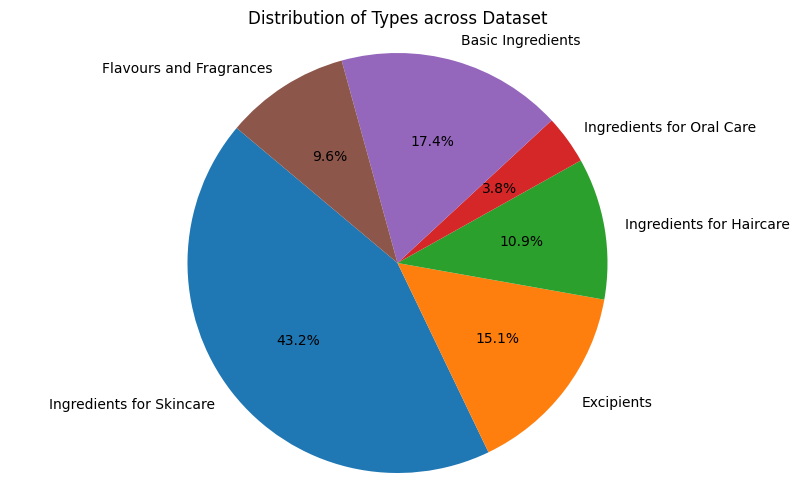

In [352]:
# Function to split and count values
def count_types(types):
    type_counts = {}
    for cell in types:
        types_list = [t.strip() for t in cell.split(',')]  # Split by comma and strip whitespace
        for t in types_list:
            if t in type_counts:
                type_counts[t] += 1
            else:
                type_counts[t] = 1
    return type_counts

# Count occurrences of each type across all rows
type_counts = count_types(df['Type Function'])

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types across Dataset')
plt.axis('equal')
plt.show()

This classification does not quite satisfy me, as many functions are specific to several groups at once and it is possible to make a mistake. Plus in one classification the ingredients are divided into several categories "hair or skin", "basic or excipients", etc. It seems to me that the classification should reflect that there should be a maximum number of ingredients for a cosmetic base (not Ingredients for Skincare).

In [353]:
# Assuming df is your DataFrame
df.replace('', np.nan, inplace=True)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29297 entries, 0 to 30069
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COSING Ref No                  29297 non-null  int64         
 1   INCI name                      29297 non-null  object        
 2   Chem/IUPAC Name / Description  28839 non-null  object        
 3   Restriction                    1878 non-null   object        
 4   Function                       29297 non-null  object        
 5   Update Date                    29297 non-null  datetime64[ns]
 6   Multifunctionality             29297 non-null  bool          
 7   Type Function                  29297 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1.8+ MB


In [355]:
# Unique restrictions
unique_restrictions = df['Restriction'].unique()
print(unique_restrictions)

[nan 'II/665\n\nCMR1b (Reprotoxic 1B)' 'II/1254' 'III/202' 'III/32'
 'II/1228' 'Annex III/212' 'III/300' 'III/88\nIII/167\nIII/168' 'III/16'
 'II/1213' 'II/1227' 'II/1314' 'II/1214' 'II/1338' 'III/242' 'III/301'
 'II/1215' 'III/218' 'III/9' 'III/238' 'III/4'
 'Annex III/211 - Directive 2012/21/EU' 'II/1317' 'III/245' 'II/383'
 'II/384' 'III/252' 'III/61' 'II/1230' 'V/21' 'II/1318' 'III/201\n'
 'III/177' 'III/222' 'III/236' 'II/1216' 'Annex III/213' 'III/229'
 'III/243' 'II/241' 'II/1287' 'II/1319' 'II/1229' 'II/1248' 'II/1247'
 'III/19' 'III/227' 'III/303' 'II/1379 - Reg (EU) No 1298/2015' 'III/121'
 'III/198' 'III/172' 'II/1250' 'II/250' 'III/248' 'II/1309' 'II/1218'
 'II/1217' 'II/1307' 'II/1389' 'III/241' 'II/412' 'III/215' 'III/244'
 'II/1219' 'Annex III/199' 'II/406' 'III/22' 'V/12' 'II/1220' 'III/205'
 'II/1221' 'VI/18' 'II/1282' 'Annex III/240' 'II/1251' 'III/249' 'II/1549'
 'III/155' 'II/1308' 'Annex III/208' 'II/1222' 'V/20' 'II/1315'
 'Annex III/209' 'II/1212' 'III/203' 'III/

In [356]:
# Create 'Restriction Boolean' column
df['IS_Restriction'] = df['Restriction'].apply(lambda x: False if pd.isna(x) or x == '' else True)

# Display the updated DataFrame
df

,COSING Ref No,INCI name,Chem/IUPAC Name / Description,Restriction,Function,Update Date,Multifunctionality,Type Function,IS_Restriction
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,Disodium Tetramethylhexadecenylcysteine Formyl...,NaN,SKIN PROTECTING,2020-06-16,False,Ingredients for Skincare,False
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False,Ingredients for Skincare,False
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False,Ingredients for Skincare,False
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,(Liquidambar Styraciflua/Tribulus Terrestris)...,NaN,SKIN CONDITIONING,2017-12-01,False,Ingredients for Skincare,False
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,NaN,PLASTICISER,2018-02-14,False,Excipients,False
...,...,...,...,...,...,...,...,...,...
30065,86618,ZYGOSACCHAROMYCES MICROELLIPSOIDES FERMENT,Zygosaccharomyces Microellipsoides Ferment is ...,NaN,HUMECTANT,2010-10-15,False,Excipients,False
30066,87420,ZYGOSACCHAROMYCES/APPLE FRUIT/PAPAYA FRUIT/PIN...,Zygosaccharomyces/Apple Fruit/Papaya Fruit/Pin...,NaN,SKIN CONDITIONING,2010-10-15,False,Ingredients for Skincare,False
30067,60329,ZYMOMONAS FERMENT EXTRACT,Zymomonas Ferment Extract is an extract of the...,NaN,"HUMECTANT, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Skincare, Excipients",False
30068,60330,ZYMOMONAS FERMENT FILTRATE,Zymomonas Ferment Filtrate is a filtrate of th...,NaN,"HUMECTANT, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Skincare, Excipients",False


In [357]:
# Drop the column because they have too many empty cells and I am not planning to dive into specify
df.drop(columns=['Restriction'], inplace=True)

I'm not sure if all empty values mean there is no Restriction, but it was interesting to see what happens with this one

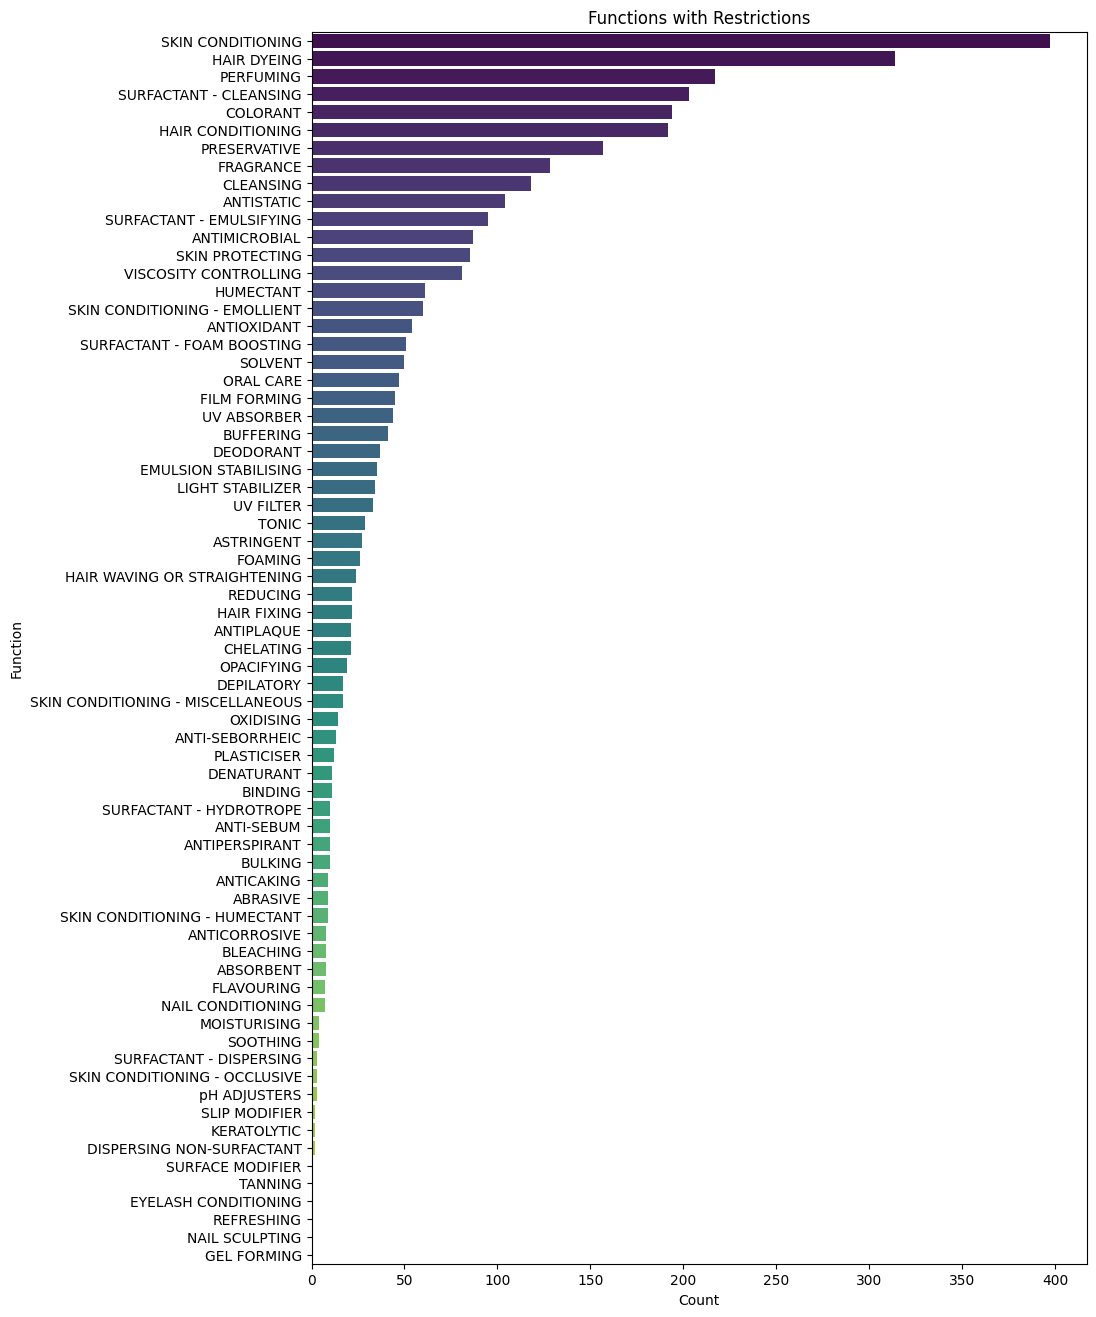

In [358]:
# Step 1: Split functions into separate rows
functions_split = df.assign(Function=df['Function'].str.split(', ')).explode('Function')

# Step 2: Filter where 'Restriction Boolean' is True
restricted_functions = functions_split[functions_split['IS_Restriction']]

# Step 3: Count occurrences of each function after filtering
function_counts = restricted_functions['Function'].value_counts()

# Step 4: Plotting
plt.figure(figsize=(10, 16))
sns.barplot(x=function_counts.values, y=function_counts.index, hue=function_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Function')
plt.title('Functions with Restrictions')
plt.show()

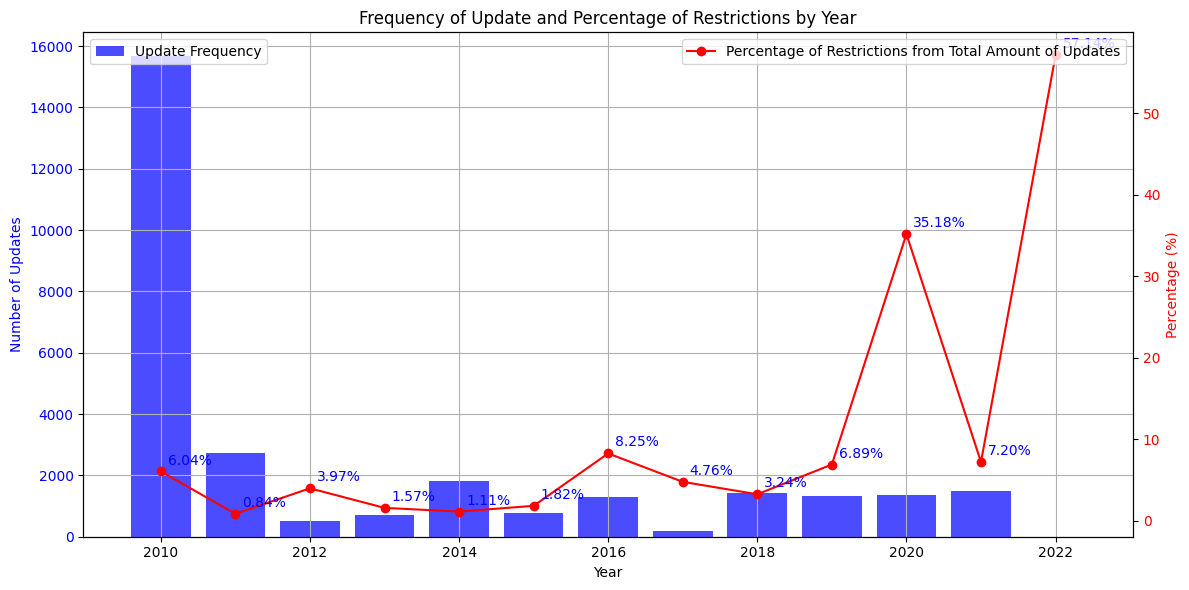

In [359]:
# extract years
df['Update Year'] = df['Update Date'].dt.year

# Calculate update counts by year
update_counts_by_year = df['Update Year'].value_counts().sort_index()

# Calculate percentage of True values in 'Restriction Boolean' column by year
percentage_true_by_year = df.groupby('Update Year')['IS_Restriction'].mean() * 100

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting update frequency by year (bar plot)
ax1.bar(update_counts_by_year.index, update_counts_by_year.values, color='b', alpha=0.7, label='Update Frequency')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Updates', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Creating a secondary y-axis for percentage of True values
ax2 = ax1.twinx()
ax2.plot(percentage_true_by_year.index, percentage_true_by_year.values, color='r', marker='o', label='Percentage of Restrictions from Total Amount of Updates')
ax2.set_ylabel('Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding percentages as annotations
for year, percentage in zip(percentage_true_by_year.index, percentage_true_by_year.values):
    ax2.annotate(f'{percentage:.2f}%', xy=(year, percentage), xytext=(5, 5), textcoords='offset points', color='b')

# Adding titles and legends
ax1.set_title('Frequency of Update and Percentage of Restrictions by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It seems that there is not enough data for 2022 and it can be ignored. However, it can be noticed that there were a lot of restrictions in 2020 (35,18%)

In [360]:
df.to_csv('pd_cosmetics_ingredients.csv', index=False)

In [391]:
df = pd.read_csv('pd_cosmetics_ingredients.csv')

In [392]:
df_api = pd.read_csv('pd_cosmetics_ingredients_v2.csv')

In [393]:
# Drop the column
df.drop(columns=['Chem/IUPAC Name / Description'], inplace=True)

In [394]:
# Select columns from df and df_api for merging
merge_cols_df = ['COSING Ref No', 'INCI name', 'Function', 'Update Date',
                 'Multifunctionality', 'Type Function', 'IS_Restriction', 'Update Year']
merge_cols_df_api = ['COSING Ref No', 'Chem/IUPAC Name / Description']

# Merge df and df_api on 'COSING Ref No' and select desired columns
merged_data = df[merge_cols_df].merge(df_api[merge_cols_df_api], on='COSING Ref No', how='left')

In [395]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29278 non-null  object
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB


In [397]:
# Identify rows with empty cells in 'Chem/IUPAC Name / Description'
empty_description_rows = merged_data[merged_data['Chem/IUPAC Name / Description'].isnull()]

# Print all rows with empty cells in 'Chem/IUPAC Name / Description'
empty_description_rows

,COSING Ref No,INCI name,Function,Update Date,Multifunctionality,Type Function,IS_Restriction,Update Year,Chem/IUPAC Name / Description
17076,87221,NITROPHENOL,HAIR DYEING,2010-10-15,False,Ingredients for Haircare,False,2010,NaN
17119,93363,NONAPEPTIDE-29 AMIDO CARBOXYMETHYL HYDROXYLIMI...,"SKIN CONDITIONING, SKIN PROTECTING",2015-10-23,True,Ingredients for Skincare,False,2015,NaN
17381,86948,OCTATRIENOIC ACID,ANTIOXIDANT,2010-10-15,False,Excipients,False,2010,NaN
17439,87075,OCTYLDODECYL GLYCOL GRAPESEEDATE,"HAIR CONDITIONING, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Haircare, Ingredients for Skin...",False,2010,NaN
17524,82612,OLEAMIDE DIPA,"SURFACTANT - CLEANSING, SURFACTANT - EMULSIFYI...",2016-11-21,True,Basic Ingredients,True,2016,NaN
17570,94216,OLEOYLOXYPHENOXY PROPIONIC ACID,"ANTIOXIDANT, SKIN CONDITIONING",2016-06-20,True,"Ingredients for Skincare, Excipients",False,2016,NaN
18026,85428,OSTHOLE,SKIN CONDITIONING,2010-10-15,False,Ingredients for Skincare,False,2010,NaN
18043,85425,OXACYCLOHEXADECENONE,"FRAGRANCE, PERFUMING",2010-10-15,True,Flavours and Fragrances,False,2010,NaN
18095,93980,OZONE,ANTIPLAQUE,2016-06-20,False,Ingredients for Oral Care,False,2016,NaN
18161,84656,P-PHENETIDINE,HAIR DYEING,2010-10-15,False,Ingredients for Haircare,True,2010,NaN


In [398]:
# Data to fill empty cells
fill_data = [
    ('NITROPHENOL', 'Restricted hair dye (Nitrophenol)'),
    ('NONAPEPTIDE-29 AMIDO CARBOXYMETHYL HYDROXYLIMINOMETHYLBENZAMIDO SH-DSRNA-1', 'Skin conditioning and protecting agent'),
    ('OCTATRIENOIC ACID', 'Antioxidant'),
    ('OCTYLDODECYL GLYCOL GRAPESEEDATE', 'Hair and skin conditioning agent'),
    ('OLEAMIDE DIPA', 'Surfactant (cleansing and emulsifying) and viscosity controlling agent'),
    ('OLEOYLOXYPHENOXY PROPIONIC ACID', 'Antioxidant and skin conditioning agent'),
    ('OSTHOLE', 'Skin conditioning agent'),
    ('OXACYCLOHEXADECENONE', 'Fragrance'),
    ('OZONE', 'Antiplaque agent in oral care products'),
    ('P-PHENETIDINE', 'Restricted hair dye (P-Phenetidyne)'),
    ('PEG-22 DIMETHACRYLATE', 'Nail conditioning agent'),
    ('PEG-3 2,2\'-DI-P-PHENYLENEDIAMINE', 'Hair dye'),
    ('PEG-3,2\',2\'-DI-P-PHENYLENEDIAMINE', 'Hair dye'),
    ('PEG-30 GLYCERYL DIISOSTEARATE', 'Surfactant (cleansing and emulsifying)'),
    ('PEG-444 PENTAERYTHRITYL TETRA(GLUTAROYLSUCCINIMIDE)', 'Skin conditioning agent'),
    ('PEG-5 ISONONANOATE', 'Surfactant (cleansing and emulsifying)'),
    ('PEG/PPG-20/20 PHENYLISOPROPYL CAPRYLYL DIMETHICONE', 'Emulsion stabilizer, hair and skin conditioning agent'),
    ('PPG-70 BIS-(2-AMINOPROPYL) ETHER', 'Buffering, bulking, and hair conditioning agent'),
    ('PROPANEDIOL DICAPRYLATE/CAPRATE', 'Skin emollient')
]

# Update empty cells in df
for inci_name, description in fill_data:
    merged_data.loc[df['INCI name'].str.strip().str.lower() == inci_name.lower(), 'Chem/IUPAC Name / Description'] = description

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29297 non-null  object
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB


# Creating a column 'Ingredient Types'

## Tokenizes and filters the description text, identifying specific terms like 'extract', 'oil', 'butter', etc.

In [400]:
# Example function to extract ingredient types
def extract_ingredient_type(description):
    if pd.isnull(description):
        return None

    # Tokenize the description and convert to lowercase
    tokens = word_tokenize(description)
    filtered_words = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stopwords.words('english')]

    ingredient_types = []

    # Conditions based on specific patterns or keywords
    if 'extract' in filtered_words:
        ingredient_types.append('Botanical Extract')
    if 'oil' in filtered_words and 'seed' in filtered_words:
        ingredient_types.append('Seed Oil')
    if 'butter' in filtered_words or 'fat' in filtered_words:
        ingredient_types.append('Fat/Butter')
    if 'alcohol' in filtered_words:
        ingredient_types.append('Alcohol')
    if 'compound' in filtered_words:
        ingredient_types.append('Compound')
    if 'gum' in filtered_words:
        ingredient_types.append('Gum')
    if 'polymer' in filtered_words:
        ingredient_types.append('Polymer')
    if 'vitamin' in filtered_words:
        ingredient_types.append('Vitamin')
    if 'mineral' in filtered_words:
        ingredient_types.append('Mineral')

    return ', '.join(ingredient_types) if ingredient_types else ''


# Applying the function to your DataFrame
merged_data['Ingredient Types'] = merged_data['Chem/IUPAC Name / Description'].apply(extract_ingredient_type)

# Displaying the result
merged_data[['Chem/IUPAC Name / Description', 'Ingredient Types']]

,Chem/IUPAC Name / Description,Ingredient Types
0,Disodium Tetramethylhexadecenylcysteine Formyl...,Compound
1,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,Botanical Extract
2,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,Seed Oil
3,(Liquidambar Styraciflua/Tribulus Terrestris)...,Botanical Extract
4,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,
...,...,...
29292,Zygosaccharomyces Microellipsoides Ferment is ...,
29293,Zygosaccharomyces/Apple Fruit/Papaya Fruit/Pin...,Botanical Extract
29294,Zymomonas Ferment Extract is an extract of the...,Botanical Extract
29295,Zymomonas Ferment Filtrate is a filtrate of th...,


In [402]:
# Assuming df is your DataFrame
merged_data.replace('', np.nan, inplace=True)

# Displaying information about the DataFrame after replacement
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29297 non-null  object
 9   Ingredient Types               9861 non-null   object
dtypes: bool(2), int64(2), object(6)
memory usage: 1.8+ MB
None


## Сategorization of cosmetic ingredients by extracting descriptive keywords after 'is' or 'are'

In [405]:
# Define stopwords and pattern
stop_words = set(stopwords.words('english'))
pattern = re.compile(r'\b(?:is|are)\s+([^.,!?]+)')  # Match after 'is' or 'are' at word boundaries

# Function to extract up to 2 words after 'is' or 'are'
def extract_keywords(description):
    try:
        match = re.search(pattern, description)
        if match:
            context = match.group(1)  # Get the text after 'is' or 'are'
            words = word_tokenize(context)
            filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

            # Extract up to 2 keywords based on POS tags (NN for singular noun, NNS for plural noun, JJ for adjective)
            tagged_words = pos_tag(filtered_words)
            keywords = []
            count = 0
            for word, tag in tagged_words:
                if count < 2 and (tag.startswith('NN') or tag == 'JJ'):
                    keywords.append(word)
                    count += 1
            keywords = ', '.join(keywords)  # Convert list to string
        else:
            keywords = ''
    except TypeError:
        keywords = ''  # Handle cases where description is not a string
    return keywords

# Apply keyword extraction to rows where 'Ingredient Types' is empty
empty_ingredient_types = merged_data[merged_data['Ingredient Types'].isnull()]

# Update only the empty 'Ingredient Types' with extracted keywords
merged_data.loc[empty_ingredient_types.index, 'Ingredient Types'] = empty_ingredient_types['Chem/IUPAC Name / Description'].apply(extract_keywords)

# Get all unique keywords from the DataFrame
all_keywords = merged_data['Ingredient Types'].tolist()  # Convert to list
unique_keywords = set(all_keywords)

print("All unique keywords found in the data:")
print(unique_keywords)

All unique keywords found in the data:
{'', 'hydroxyethyl, glycerin', 'hydrolysate, blood', 'Seed Oil, Fat/Butter', 'copolymer, methyl', 'product, esterification', 'flower, artemisia', 'mixture, hydrocarbons', 'powder, barley', 'copolymer, tea-diricinoleate', 'lipids, venemous', 'powder, hulls', 'cysteine-rich, peptide', 'saponins, ginseng', 'epsilon-caprolactone, cyclodextrin', 'triethanalomine, salt', 'ester, fraction', 'product, subsequent', 'copolymer, dilauryl', 'liquid, dried', 'copolymer, caprylyl', 'filtrate, lysate', 'non-plastic, variety', 'carbohydrate, fraction', 'butyl, derivative', 'sharp', 'hydrolysate, aloe', 'leaves', 'copolymer, ppg-10', 'ester, acid', 'hydrolysate, silk', 'oil, chlorella', 'juice, sprouts', 'waxy, fraction', 'oil, sprouts', 'vinegar, fermentation', 'sap, phyllostachys', 'complex, cholesterol', 'volatile, material', 'p-phenylenediamine, sulfate', 'c30-45, alkyl', 'powder, cobs', 'ester, reaction', 'end-product, hydrogenation', 'phosphate, ester', 'cop

In [490]:
# Print the DataFrame with extracted keywords
merged_data

,COSING Ref No,INCI name,Function,Update Date,Multifunctionality,Type Function,IS_Restriction,Update Year,Chem/IUPAC Name / Description,Ingredient Types
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,SKIN PROTECTING,2020-06-16,False,Ingredients for Skincare,False,2020,Disodium Tetramethylhexadecenylcysteine Formyl...,Compound
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False,Ingredients for Skincare,False,2021,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,Botanical Extract
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False,Ingredients for Skincare,False,2021,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,Seed Oil
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,SKIN CONDITIONING,2017-12-01,False,Ingredients for Skincare,False,2017,(Liquidambar Styraciflua/Tribulus Terrestris)...,Botanical Extract
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,PLASTICISER,2018-02-14,False,Excipients,False,2018,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,"copolymer, vinyl"
...,...,...,...,...,...,...,...,...,...,...
29292,86618,ZYGOSACCHAROMYCES MICROELLIPSOIDES FERMENT,HUMECTANT,2010-10-15,False,Excipients,False,2010,Zygosaccharomyces Microellipsoides Ferment is ...,"product, fermentation"
29293,87420,ZYGOSACCHAROMYCES/APPLE FRUIT/PAPAYA FRUIT/PIN...,SKIN CONDITIONING,2010-10-15,False,Ingredients for Skincare,False,2010,Zygosaccharomyces/Apple Fruit/Papaya Fruit/Pin...,Botanical Extract
29294,60329,ZYMOMONAS FERMENT EXTRACT,"HUMECTANT, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Skincare, Excipients",False,2010,Zymomonas Ferment Extract is an extract of the...,Botanical Extract
29295,60330,ZYMOMONAS FERMENT FILTRATE,"HUMECTANT, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Skincare, Excipients",False,2010,Zymomonas Ferment Filtrate is a filtrate of th...,"filtrate, product"


In [408]:
# Assuming df is your DataFrame
merged_data.replace('', np.nan, inplace=True)

# Displaying information about the DataFrame after replacement
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29297 non-null  object
 9   Ingredient Types               18023 non-null  object
dtypes: bool(2), int64(2), object(6)
memory usage: 1.8+ MB
None


## POS tagging, and Named Entity Recognition (NER)

In [454]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords and custom stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = {'skin', 'hair', 'conditioning', 'used', 'agent', 'derived'}

# Function to extract keywords with NER
def extract_keywords_with_ner(description):
    try:
        # Tokenize and lemmatize the description (convert to lowercase here if needed)
        tokens = word_tokenize(description)
        tokens_lemmatized = [lemmatizer.lemmatize(token.lower()) for token in tokens]

        # Perform POS tagging
        tagged_words = pos_tag(tokens_lemmatized)

        # Perform Named Entity Recognition (NER)
        ner_result = ne_chunk(tagged_words)

        # Initialize an empty list for keywords
        keywords = []

        # Iterate over NER result to filter and collect keywords
        for entity in ner_result:
            if isinstance(entity, tuple):
                word, tag = entity
                if tag.startswith('NN') and word.lower() not in stop_words and word.lower() not in custom_stop_words:
                    keywords.append(word)

                    # Limit to 2 keywords
                    if len(keywords) == 2:
                        break

        # Join selected keywords into a single string
        keywords_str = ', '.join(keywords)

        return keywords_str

    except TypeError:
        return np.nan  # Handle cases where description is not a string or processing fails


# Function to update 'Ingredient Types' using keyword extraction with NER
def update_ingredient_types(row):
    description = row['Chem/IUPAC Name / Description']
    ingredient_type = row['Ingredient Types']

    if pd.isnull(ingredient_type):
        if description.strip() in ['', '\n']:
            return np.nan  # Skip invalid descriptions
        keywords = extract_keywords_with_ner(description)
        return keywords
    else:
        return ingredient_type

# Apply the function to update 'Ingredient Types'
merged_data['Ingredient Types'] = merged_data.apply(update_ingredient_types, axis=1)

In [455]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29297 non-null  object
 9   Ingredient Types               29294 non-null  object
dtypes: bool(2), int64(2), object(6)
memory usage: 1.8+ MB


In [456]:
# Assuming df is your DataFrame
merged_data.replace('', np.nan, inplace=True)

In [457]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  29297 non-null  int64 
 1   INCI name                      29297 non-null  object
 2   Function                       29297 non-null  object
 3   Update Date                    29297 non-null  object
 4   Multifunctionality             29297 non-null  bool  
 5   Type Function                  29297 non-null  object
 6   IS_Restriction                 29297 non-null  bool  
 7   Update Year                    29297 non-null  int64 
 8   Chem/IUPAC Name / Description  29297 non-null  object
 9   Ingredient Types               29291 non-null  object
dtypes: bool(2), int64(2), object(6)
memory usage: 1.8+ MB


In [458]:
# Filter rows with empty 'Ingredient Types'
empty_ingredient_types = merged_data[merged_data['Ingredient Types'].isnull()]

## Manual filling

In [459]:
# Print specific columns for rows with empty 'Ingredient Types'
empty_ingredient_types

,COSING Ref No,INCI name,Function,Update Date,Multifunctionality,Type Function,IS_Restriction,Update Year,Chem/IUPAC Name / Description,Ingredient Types
20,98158,(20S)-PROTOPANAXADIOL,"SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIE...",2020-04-30,True,Ingredients for Skincare,False,2020,\n,NaN
3826,54719,BIS-PPG-15 DIMETHICONE/IPDI COPOLYMER,FILM FORMING,2010-10-15,False,Basic Ingredients,False,2010,\n,NaN
17439,87075,OCTYLDODECYL GLYCOL GRAPESEEDATE,"HAIR CONDITIONING, SKIN CONDITIONING",2010-10-15,True,"Ingredients for Haircare, Ingredients for Skin...",False,2010,Hair and skin conditioning agent,NaN
18026,85428,OSTHOLE,SKIN CONDITIONING,2010-10-15,False,Ingredients for Skincare,False,2010,Skin conditioning agent,NaN
19176,86274,PEG-444 PENTAERYTHRITYL TETRA(GLUTAROYLSUCCINI...,SKIN CONDITIONING,2010-10-15,False,Ingredients for Skincare,False,2010,Skin conditioning agent,NaN
21032,58354,POLYESTER-5,"FILM FORMING, VISCOSITY CONTROLLING",2010-10-15,True,Basic Ingredients,False,2010,\n,NaN


In [460]:
# Update missing values manually
merged_data.loc[20, 'Chem/IUPAC Name / Description'] = '(20S)-PROTOPANAXADIOL'
merged_data.loc[20, 'Ingredient Types'] = 'Skin conditioning, Skin protecting'

merged_data.loc[3826, 'Chem/IUPAC Name / Description'] = 'BIS-PPG-15 DIMETHICONE/IPDI COPOLYMER'
merged_data.loc[3826, 'Ingredient Types'] = 'Film forming'

merged_data.loc[17439, 'Chem/IUPAC Name / Description'] = 'OCTYLDODECYL GLYCOL GRAPESEEDATE'
merged_data.loc[17439, 'Ingredient Types'] = 'Hair conditioning, Skin conditioning'

merged_data.loc[18026, 'Chem/IUPAC Name / Description'] = 'OSTHOLE'
merged_data.loc[18026, 'Ingredient Types'] = 'Skin conditioning'

merged_data.loc[19176, 'Chem/IUPAC Name / Description'] = 'PEG-444 PENTAERYTHRITYL TETRA(GLUTAROYLSUCCINIMIDE)'
merged_data.loc[19176, 'Ingredient Types'] = 'Skin conditioning'

merged_data.loc[21032, 'Chem/IUPAC Name / Description'] = 'POLYESTER-5'
merged_data.loc[21032, 'Ingredient Types'] = 'Film forming, Viscosity controlling'

In [461]:
# Assuming df is your DataFrame
merged_data.replace('', np.nan, inplace=True)

## Visualisation

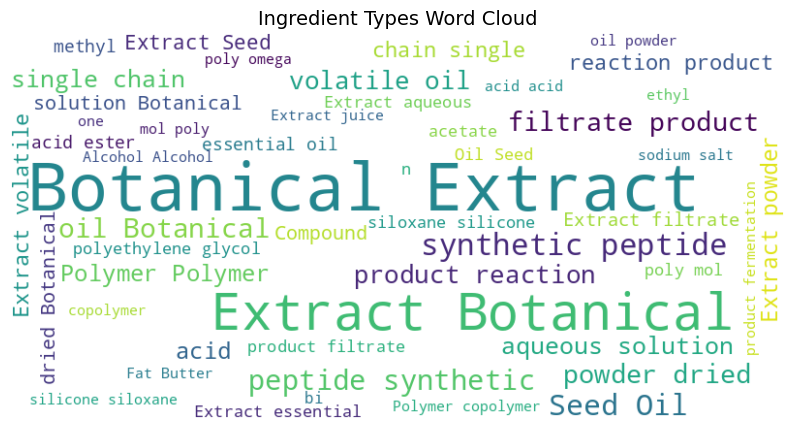

In [480]:
# Assuming merged_data is your DataFrame with the cleaned Ingredient Types
ingredient_types_combined = ' '.join(merged_data['Ingredient Types'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=50, contour_width=3, contour_color='steelblue').generate(ingredient_types_combined)

# Display word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Types Word Cloud', fontsize=14)
plt.show()

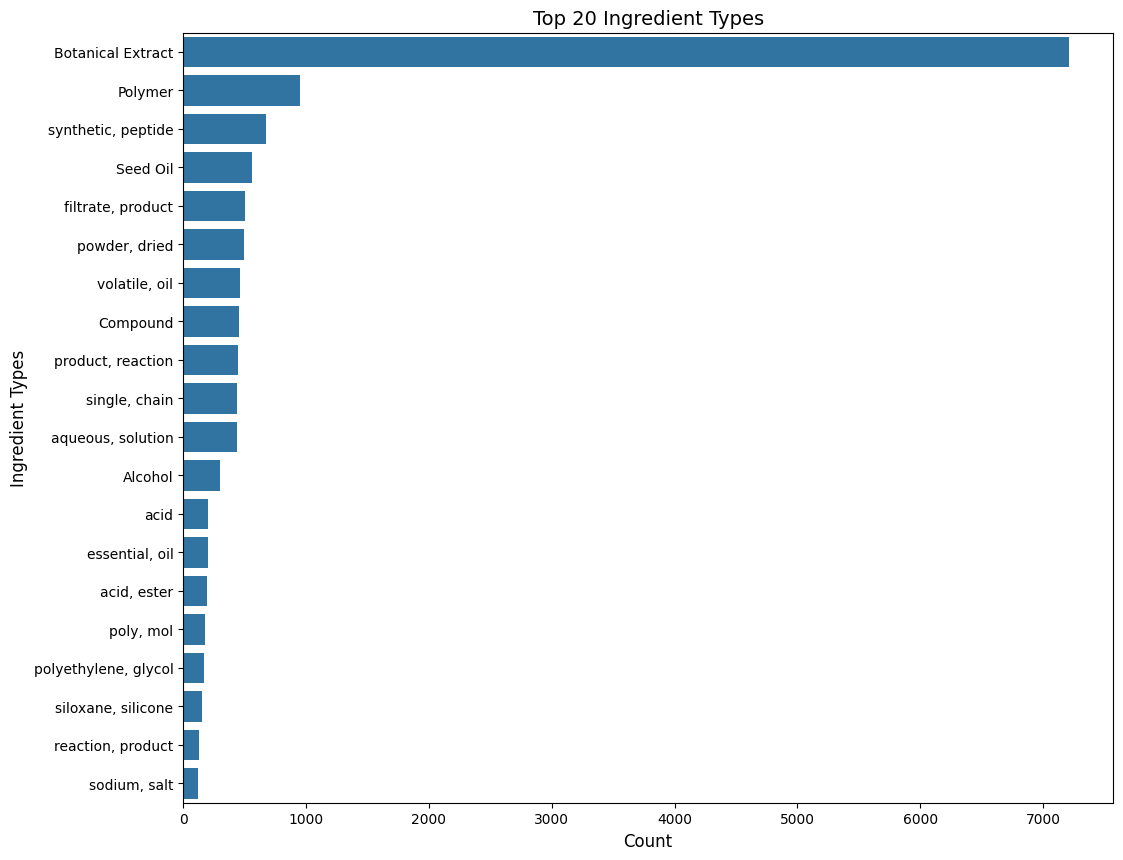

In [494]:
# Countplot of Ingredient Types
plt.figure(figsize=(12, 10))
sns.countplot(y='Ingredient Types', data=merged_data, order=merged_data['Ingredient Types'].value_counts().index[:20])
plt.title('Top 20 Ingredient Types', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Ingredient Types', fontsize=12)
plt.show()

In [ ]:
# Assuming merged_data is your DataFrame with the cleaned Ingredient Types
unique_values = merged_data['Ingredient Types'].dropna().unique()

# Print unique values
for value in unique_values:
    print(value)

In [ ]:
# Assuming merged_data is your DataFrame with the cleaned Ingredient Types
ingredient_types = merged_data['Ingredient Types'].dropna()

# Clean and extract meaningful unique values
cleaned_values = set()
for value in ingredient_types:
    # Split by commas and remove whitespace
    types = [t.strip() for t in re.split(r',|\[|\]', value) if t.strip()]
    cleaned_values.update(types)

# Print cleaned unique values
for value in cleaned_values:
    print(value)

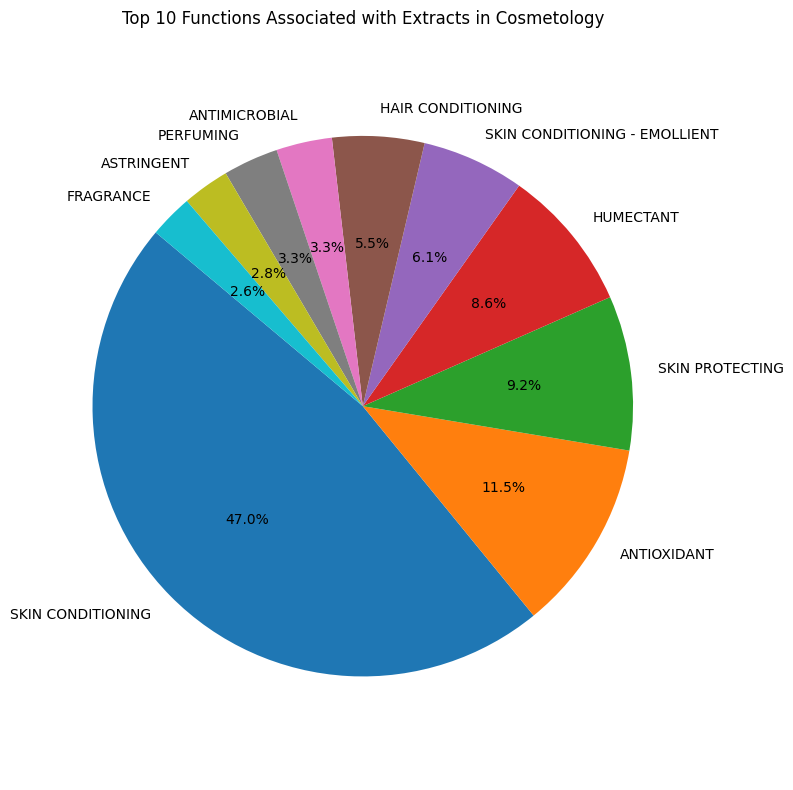

In [489]:
# Filter data for ingredients categorized as extracts
extract_data = merged_data[merged_data['Ingredient Types'].str.contains('extract', case=False, na=False)]

# Mapping extract types to functions
type_to_function = defaultdict(list)
for index, row in extract_data.iterrows():
    functions = [f.strip() for f in row['Function'].split(',')]
    for function in functions:
        type_to_function[row['INCI name']].append(function)

# Aggregate functions across all extract types
function_counts = defaultdict(int)
for ext, funcs in type_to_function.items():
    for func in funcs:
        function_counts[func] += 1

# Sort functions by count
sorted_functions = sorted(function_counts.items(), key=lambda x: x[1], reverse=True)

# Prepare data for visualization (top N functions)
top_n = 10  # Example: Display top 10 functions
functions = [func for func, count in sorted_functions[:top_n]]
counts = [count for func, count in sorted_functions[:top_n]]

# Plotting pie chart for functions associated with extracts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=functions, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Functions Associated with Extracts in Cosmetology')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# SUMMARY
Initially, the data was presented in ten columns and in a maximum number of rows of 30070, minimum 183.

Thus, I removed the columns with a large number of empty cells. And focused on INCI name, Chem/IUPAC Name / Description, Restriction, Function, Update Date.

Since I still had Restrictions in my data, it was interesting to check the correlation between whether an ingredient has a pharmaceutical name and how that relates to Restrictions.

There is a slight correlation (the difference between "Proportion of Ingredients with Restrictions among those with Ph. Eur. Name: 28.42%" and "Proportion of Ingredients with Restrictions among all ingredients: 6.48%" is more than 4 times). Most likely some of the ingredients belong not only to the cosmetics industry, but also to the pharmaceutical industry, which implies different standards and more restrictions. But it is not known for sure why there are so many empty cells, perhaps there is just no information, so I deleted this column.

When analysing the functions, it can be seen that many ingredients are inherently multifunctional (this can be clearly seen in the pie chart). Although the fact that ingredients with a single function are slightly more numerous than multifunctional ingredients, this is not really true, as a single function may in fact turn out to be multifunctional, e.g. "antioxidants" not only protect the skin but also the cosmetic product itself.

The most common feature is SKIN CONDITIONING, with PERFUMING coming in second, but when considering unique features the top 5 are CONDITIONINGs and SURFACTANTs. Which seems logical.
When analysing the unique functions (and **there are only 80** of them), it seems that they are not so unique, some of them are repetitive (take at least the variety of CONDITIONINGs and SURFACTANTs).

I spent a lot of time trying to unify them and shorten the list. As a result, I took the method presented on the site https://cosmileeurope.eu/inci/. It made it possible to place ingredients in six groups and evaluate their scale. I didn't like the result much, although it was expected. However, it seems to me that at first it was necessary to maintain two bases for hair and for body (if the ingredients are divided according to this criterion) and within these subclasses the ingredients should be classified according to their functionality in the recipe (for example, base, active components, etc.)

With Restrictions there were also a lot of empty cells, I duplicated this column with true/false values. And I looked at the distribution by year. It can be noted that 2020, for some reason, was unusually rich in restrictions in cosmetics.



To fill in the empty cells in the "Chem/IUPAC Name / Description" column, I used the API from Gemini (the code is not in this file). Since the queries were in chunks, the style of the answers unfortunately varied a bit. Some values had to be entered manually, due to technical difficulties.

I was aiming to keep this column because it specifies interesting information about the ingredients (what they are, their type). While Function Type characterises what these ingredients are for in the recipe.
Based on the information from the "Chem/IUPAC Name / Description", I created the "Ingredient Types" column. To do this, I used different methods:

1) Tokenises and filters the description text, identifying specific terms like 'extract', 'oil', 'butter', etc.

2) Categorisation of cosmetic ingredients by extracting descriptive keywords after 'is' or 'are'

3) POS tagging, and Named Entity Recognition (NER)

The result was not very good, a lot of trash. For the perspective of further improvement. The first method (search for specific words) worked best, but there are a lot of chemical formulas in the table and it is not possible to work with them in this way.

Nevertheless, it is possible to extract information from this data. From the analysis we can see that the most widespread type is "Extract", most often these are botanical extracts, it is interesting to see what functions they can perform in compositions. And here SKIN CONDITIONING comes first again.

This was the initial analysis. My recommendations are to develop standard lists of types and functions, then more useful information can be extracted.